In [13]:
import numpy as np
from tqdm import tqdm

SEGMENT_SIZE = 30
BINS_QUANTITY = 50

n_bins = np.empty((0, BINS_QUANTITY + 1))

for db in ['AFIB', 'LTAFDB', 'NSRDB']:
    label = -1 if db == 'NSRDB' else 1
    rri_output = np.load(f'./output/{db}.npy')

    # rri_quantity = rri_output.shape[0]
    rri_quantity = 30000

    segments = []
    for i in range(0, rri_quantity, SEGMENT_SIZE):
        segment = rri_output[i:i+SEGMENT_SIZE]
        segments.append(segment.tolist())
    
    # Reduce samples
    segments = segments[0:1000]

    for segment in tqdm(segments):
        hist, edges = np.histogram(segment, bins=BINS_QUANTITY - 1)
        row = np.append(edges, label).reshape((1, BINS_QUANTITY + 1))
        n_bins = np.vstack((n_bins, row))

y = n_bins[:, -1]
X = n_bins[:, 0:-1]

100%|██████████| 1000/1000 [00:00<00:00, 4101.64it/s]


In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

""" parameter_space_svm = {'C': [1, 10, 100, 1000],
                       'gamma': [0.01, 0.1, 0, 1], 
                       'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 
                       'degree': [1, 2, 3],
                       'coef0': [0.001, 0, 1, 2]} """
parameter_space_svm = {'C': [0.1, 1, 10], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear', 'rbf']}

grid_svm = GridSearchCV(SVC(), parameter_space_svm, n_jobs=2, cv=5, verbose=1)
grid_svm.fit(X, y)
print('Best parameters found:\n', grid_svm.best_params_, grid_svm.best_score_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


KeyboardInterrupt: 

0.9626666666666667


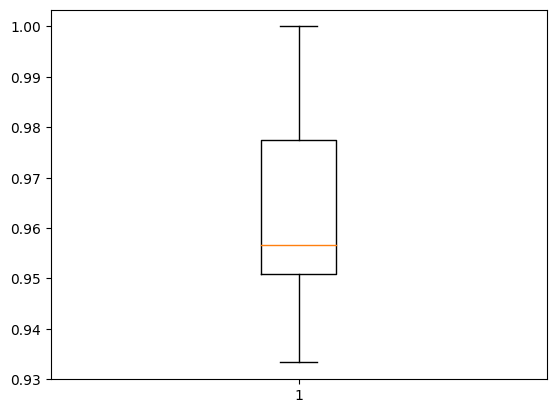

In [15]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.svm import SVC
from matplotlib import pyplot as plt

clf_svm = SVC(C=1, gamma=0.0001, kernel="rbf")
kfold = StratifiedKFold(n_splits=10)
cv_results = cross_val_score(clf_svm, X, y, cv=kfold, scoring='accuracy')
print(cv_results.mean())
plt.boxplot(cv_results)
plt.show()